# Nota de Estudo ‚Äî Movimento Longitudinal da Motocicleta - Normais, Curvas, Fracionamento da Energia e Fatores de Utiliza√ß√£o

> **Autor:** F√°bio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mec√¢nica - UFPE  
> **In√≠cio do desenvolvimento:** 14/10/2025  
> **Primeira publica√ß√£o:** 20/10/2025  
> **Vers√£o Atual:** v-2025-10-20 (fase de teste t√©cnico no Colab; uso pedag√≥gico com estudantes e in√≠cio da revis√£o final de c√≥digo/texto)



---

O modelo b√°sico usado neste notebook est√° em Magnani(2025), e a teoria em Magnani(2025a-c).

## Objetivo

Partindo de um modelo b√°sico da moto, acrescentar o c√°lculo de:   
    - For√ßas normais,   
    - For√ßas em curvas,   
    - Fracionamento da pot√™ncia,   
    - Consumo espec√≠fico instant√¢neo,


## Refer√™ncias

- Magnani, F√°bio. ‚ÄúF√≠sica B√°sica das Motos‚Äù, 2020a.  
- Magnani, F√°bio. ‚ÄúSolu√ß√£o Computacional do Movimento das Motos‚Äù, 2020b.  
- Magnani, F√°bio. ‚ÄúO Motor da Moto‚Äù, 2020c.
- Magnani, F√°bio. ‚ÄúMovimento Longitudinal da Motocicleta - Din√¢mica B√°sica‚Äù, 2025.

## Principais simplifica√ß√µes

- Efici√™ncia de transmiss√£o 100%
- Rendimento do motor constante

## Estrutura

## Nota√ß√£o b√°sica




## Simula√ß√£o Din√¢mica de Motocicleta

A Fig.1 mostra as for√ßas atuando em uma motocicleta, sendo a propuls√£o √† frente, e a frenagem, a resist√™ncia aerodin√¢mica, a resist√™ncia √† rolagem e a a√ß√£o da gravidade (no caso de subidas) resistindo ao movimento. O modelo deste *notebook* √© apresentado em mais detalhes em Magnani (2025) e a teoria completa em Magnani (2025b).

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-01.png" alt="Balan√ßo de for√ßas na motocicleta" width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Balan√ßo de for√ßas na motocicleta.</figcaption>
</figure>

Fa√ßamos um breve resumo. Aplicando a 2¬™ Lei de Newton (balan√ßo de for√ßas) na dire√ß√£o do movimento ($x$), chegamos a:

$$
\frac{\mathrm{d}V}{\mathrm{d}t}
= \alpha \,\frac{ P_{\max}}{m\,V}
- \beta_t\,\mu\, N_{rt}
- \beta_d\,\mu\, N_{rd}
- \frac{1}{2}\rho\, C_{D}\, A_{f}\,\frac{V^{2}}{m}
- C_{R}\, g \cos\theta
- g \sin\theta .
\tag{1}
$$


Onde:

$$
\begin{aligned}
t &: \text{ tempo (s)} \\
x &: \text{ posi√ß√£o (m)} \\
V &: \text{ velocidade (m/s)} \\
a &: \text{ acelera√ß√£o longitudinal } (a=\mathrm{d}V/\mathrm{d}t) \\
m &: \text{ massa moto+piloto (kg)} \\
P_{\max} &: \text{ pot√™ncia m√°xima do motor (W)} \\
\mu &: \text{ coeficiente de atrito pneu‚Äìpista} \\
\theta &: \text{ inclina√ß√£o da pista (rad)} \\
\rho &: \text{ densidade do ar (kg/m}^3\text{)} \\
A_f &: \text{ √°rea frontal (m}^2\text{)} \\
C_R &: \text{ coeficiente de resist√™ncia √† rolagem} \\
C_D &: \text{ coeficiente de arrasto aerodin√¢mico} \\
\alpha &: \text{ fra√ß√£o de uso do motor em }[0,1] \\
\beta_t,\ \beta_d &: \text{ fra√ß√µes de uso de atrito traseiro/dianteiro em }[0,1] \\
N_{rt},\ N_{rd} &: \text{ Normais nas rodas traseira e dianteira (N)} \\
W &: \text{ velocidade do vento longitudinal (m/s, sinal no mesmo sentido de $V$)} \\
R_{\text{curva}} &: \text{ raio da curva (m)} \\
k_A &: \text{ par√¢metro aerodin√¢mico } \left(k_A=\tfrac{1}{2}\rho C_D A_f\right)
\end{aligned}
$$

As normais s√£o obtidas do balan√ßo de for√ßas em $y$ e do balan√ßo de momentos em torno do contato entre o piso e o pneu traseiro:

$$
N_{rt} = m\, g \cos\theta 
\left(1 - \frac{p_{CG}}{p_d}\right)
+ \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d},
\qquad
N_{rd} = m\, g \cos\theta \,\frac{p_{CG}}{p_d}
- \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d}.
\tag{2‚Äì3}
$$

---

### Par√¢metros num√©ricos usados no Caso Base

| S√≠mbolo | Valor | Unidade | Faixa t√≠pica / Observa√ß√£o | Coment√°rio sobre a escolha |
|---|---:|---|---|---|
| $Œ±$  | 1.0 | ‚Äì | 0‚Äì1 | Uso pleno do motor no caso-base. |
| $Œ≤_t$  | 0 | ‚Äì | 0‚Äì1 | Sem frenagem traseira no trecho de acelera√ß√£o. |
| $Œ≤_d$  | 0 | ‚Äì | 0‚Äì1 | Sem frenagem dianteira no trecho de acelera√ß√£o. |
| $m$ | 250 | kg | 180‚Äì300 | Moto+piloto+carga. |
| $Œº$ | 0.8 | ‚Äì | 0.6‚Äì1.0 | Ader√™ncia alta (asfalto seco). |
| $g$ | 9.81 | m/s¬≤ | 9.79‚Äì9.83 | Padr√£o SI. |
| $Œ∏$  | 0 | rad | ‚àí0.15 a 0.15 | Trecho plano. |
| $œÅ$ | 1.225 | kg/m¬≥ | 1.1‚Äì1.3 | N√≠vel do mar, 0‚Äì30 ¬∞C. |
| $C_D$ | 0.7 | ‚Äì | 0.6‚Äì0.9 | Piloto ereto; n√£o carenada. |
| $A_f$ | 0.7 | m¬≤ | 0.6‚Äì0.8 | √Årea frontal t√≠pica. |
| $C_R$ | 0.02 | ‚Äì | 0.01‚Äì0.03 | Pneus em asfalto. | 
| $V_{0}$ | 0.01 | m/s | 0.01‚Äì0.5 | Evita singularidade em $P_{\max}/(mV)$. |
| $t_{0}$ | 0 | s | ‚Äì | In√≠cio da simula√ß√£o. |
| $t_f$ | 30 | s | 10‚Äì60 | Janela para atingir regime. |
| $h_{CG}$ | 0.72 | m | 0.6‚Äì0.8 | Altura do CG. |
| $h_{CP}$ | 0.95 | m | 0.8‚Äì1.1 | Altura do centro de press√£o. |
| $p_d$ | 1.40 | m | 1.3‚Äì1.5 | Dist√¢ncia entre eixos. |
| $p_{CG}$ | 0.67 | m | 0.6‚Äì0.8 | Dist√¢ncia do CG ao eixo traseiro (ligeiramente atr√°s do centro). |
| $W$ | 0 | m/s | ‚àí10 a 10 | Vento longitudinal (caso-base: calmo). |
| $R_{\text{curva}}$ | 1e10 | m | 30‚Äì300 | No caso base, estamos usando R=$ \infty $, *i.e.*, uma reta.  |

---

## Pot√™ncia do Motor

Usando um modelo simples que relaciona a pot√™ncia com par√¢metros b√°sicos:

$$
P_{motor}(\omega) =
\begin{cases}
\eta_m \, \eta_{vol} \, \omega \, T_{ref}, & \omega < \omega_{red}\\[4pt]
0, & \omega \ge \omega_{red}
\end{cases}
\tag{4}
$$

com

$$
\begin{aligned}
T_{ref} & = \dfrac{1}{4\pi}\,V_{desl}\!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma\,PC_{comb}\,M_{comb}}{\sigma+\lambda\,\gamma}, \qquad
\gamma = x+\dfrac{y}{4}-\dfrac{z}{2}, \qquad
M_{comb} = x\,M_C + y\,M_H + z\,M_O .
\end{aligned}
$$

A rela√ß√£o total de transmiss√£o muda com a marcha $i_g$:

$$
i_{tot} = i_{primary}\; i_{final}\; i_g
$$

Temos ent√£o  a seguinte rela√ß√£o entre a velocidade e a rota√ß√£o do motor:

$$
\omega = i_{tot}\,\frac{V}{R_{rod}}   \tag{5}
$$

### Par√¢metros do modelo de pot√™ncia

#### **1. Par√¢metros atmosf√©ricos**

| S√≠mbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observa√ß√£o |
|:---:|:---|---:|---|---|---|
| $p_a$ | Press√£o absoluta do ar | 101 325 | Pa | 1 atm | Condi√ß√£o padr√£o ao n√≠vel do mar |
| $T_a$ | Temperatura do ar | 293.15 | K | 20 ¬∞C | Condi√ß√£o ambiente m√©dia |
| $R$ | Constante universal dos gases | 8.314 √ó 10‚Å∞ | J/(mol¬∑K) | ‚Äì | Valor universal |
| $\sigma$ | Fra√ß√£o molar de O‚ÇÇ no ar | 0.21 | ‚Äì | 21 % | Atmosfera padr√£o |
| $\lambda$ | Fator de excesso de ar (raz√£o ar/comb. real √∑ te√≥rica) | 1.0 | ‚Äì | ‚Äì | Mistura estequiom√©trica |

---

#### **2. Par√¢metros do motor**

| S√≠mbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observa√ß√£o |
|:---:|:---|---:|---|---|---|
| $V_{desl}$ | Volume deslocado total (cilindrada) | 3.00 √ó 10‚Åª‚Å¥ | m¬≥ | 300 cm¬≥ | Moto de m√©dia cilindrada |
| $\eta_{vol}$ | Efici√™ncia volum√©trica | 0.90 | ‚Äì | 90 % | Moto aspirada em regime m√©dio |
| $\eta_m$ | Rendimento mec√¢nico global | 0.30 | ‚Äì | 30 % | Inclui perdas mec√¢nicas e t√©rmicas |
| $\omega_{red}$ | Rota√ß√£o limite (redline) | 995 rad/s | rad/s | 9 500 rpm | A partir daqui a pot√™ncia √© anulada no modelo |
| $P_{motor}$ | Pot√™ncia do motor (sa√≠da efetiva) | *calculada* | W | kW ou hp | Via equa√ß√£o $P=\eta_m \eta_{vol} \omega T_{ref}$ |

---

#### **3. Par√¢metros do combust√≠vel (gasolina ‚âà C‚ÇàH‚ÇÅ‚Çà)**

| S√≠mbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observa√ß√£o |
|:---:|:---|---:|---|---|---|
| $x, y, z$ | Coeficientes estequiom√©tricos (C‚ÇìH_yO_z) | 8, 18, 0 | ‚Äì | ‚Äì | Combust√≠vel gen√©rico tipo gasolina |
| $M_C$ | Massa molar do carbono | 12.011 √ó 10‚Åª¬≥ | kg/mol | 12.011 g/mol | ‚Äì |
| $M_H$ | Massa molar do hidrog√™nio | 1.008 √ó 10‚Åª¬≥ | kg/mol | 1.008 g/mol | ‚Äì |
| $M_O$ | Massa molar do oxig√™nio | 15.999 √ó 10‚Åª¬≥ | kg/mol | 15.999 g/mol | ‚Äì |
| $M_{comb}$ | Massa molar da mol√©cula de combust√≠vel | 0.11423 | kg/mol | 114.23 g/mol | Para C‚ÇàH‚ÇÅ‚Çà |
| $PC_{comb}$ | Poder calor√≠fico inferior | 44.8 √ó 10‚Å∂ | J/kg | 44.8 MJ/kg | Gasolina comercial |
| $\rho_{comb}$ | Densidade do combust√≠vel | 0.74 | kg/litro | 0.74 kg/litro | Gasolina comercial |
| $\gamma$ | Termo auxiliar ($x + y/4 - z/2$) | 12.5 | ‚Äì | ‚Äì | Determina a propor√ß√£o te√≥rica de O‚ÇÇ |


####  **4. Par√¢metros da transmiss√£o**

| S√≠mbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observa√ß√£o |
|:---:|:---|---:|:---|:---|:---|
| $R_{\text{rod}}$ | Raio efetivo da roda traseira | 0.30 | m | 300 mm | Raio din√¢mico roda+pneu |
| $i_{\text{prim}}$ | Rela√ß√£o prim√°ria | 2.40 | ‚Äì | ‚Äì | Virabrequim ‚Üí eixo de entrada |
| $i_{\text{marcha}}$ | Rela√ß√µes (1¬™‚Üí5¬™) | [2.50, 1.80, 1.40, 1.20, 1.00] | ‚Äì | ‚Äì | **Faixas t√≠picas**: 1¬™ 2.2‚Äì2.8 (sa√≠da do zero); 2¬™ 1.6‚Äì2.1; 3¬™ 1.3‚Äì1.6; 4¬™ 1.1‚Äì1.3; 5¬™ 0.9‚Äì1.1 (muitas motos t√™m ‚Äúoverdrive‚Äù < 1). |
| $i_{\text{final}}$ | Rela√ß√£o final | 2.60 | ‚Äì | ‚Äì | Ex.: 3.20 ‚Äúcurta‚Äù (acelera melhor) vs 2.60 ‚Äúlonga‚Äù (Vm√°x maior). |
| $i_{\text{tot}}$ | $i_{\text{prim}}\cdot i_{\text{marcha}}\cdot i_{\text{final}}$ | ‚Äì | ‚Äì | ‚Äì | Multiplica torque/rota√ß√£o entre motor e roda. |

---

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-02.png" alt="Balan√ßo de for√ßas na motocicleta" width="1200" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Balan√ßo de for√ßas na motocicleta.</figcaption>
</figure>



## Curva: for√ßas laterais, resultantes de atrito e fatores de uso

**For√ßa centr√≠peta total e divis√£o por eixo** (raio constante $R_{\text{curva}}$):

$$
F_{\text{cen}}=\frac{m\,V^2}{R_{\text{curva}}},\qquad
F_{\text{cen,d}}=\frac{m\,V^2}{R_{\text{curva}}}\,\frac{p_{CG}}{p_d},\qquad
F_{\text{cen,t}}=\frac{m\,V^2}{R_{\text{curva}}}\left(1-\frac{p_{CG}}{p_d}\right).
\tag{5}
$$

**Resultantes de atrito por roda** (combina√ß√£o longitudinal‚Äìlateral):

$$
\bigl|F_{\text{at,d}}\bigr| = \sqrt{F_{\text{frn,d}}^{\,2}+F_{\text{cen,d}}^{\,2}},\qquad
\bigl|F_{\text{at,t}}\bigr| = \sqrt{(F_{\text{pro}}+F_{\text{frn,t}})^{2}+F_{\text{cen,t}}^{\,2}} .
\tag{6}
$$

**Capacidade dispon√≠vel de atrito** (c√≠rculo/elipse de atrito):

$$
\bigl|F_{\text{disp,d}}\bigr|=\mu\,N_{rd},\qquad
\bigl|F_{\text{disp,t}}\bigr|=\mu\,N_{rt}.
\tag{7}
$$

### Fatores de uso (reformulados como **margens** $\epsilon$)

Definimos margens $\epsilon$ tais que **$\epsilon<0$ indica condi√ß√£o ruim/excedida**:

- **Ader√™ncia** (quanto falta para saturar o atrito em cada roda):
$$
\epsilon_{\text{ad,d}} = 1-\frac{\bigl|F_{\text{at,d}}\bigr|}{\bigl|F_{\text{disp,d}}\bigr|} \tag{8}
$$

$$
\epsilon_{\text{ad,t}} = 1-\frac{\bigl|F_{\text{at,t}}\bigr|}{\bigl|F_{\text{disp,t}}\bigr|} \tag{9}
$$

- **Normal** (quanto falta para perder contato/transfer√™ncia cr√≠tica)**:** seja $N_{\text{est,d}}=m\,g\cos\theta\,\dfrac{p_{CG}}{p_d}$ e $N_{\text{est,t}}=m\,g\cos\theta\,\left(1-\dfrac{p_{CG}}{p_d}\right)$ as normais **est√°ticas puras** (sem in√©rcia/arrasto). Ent√£o

$$
\epsilon_{\text{no,d}}=\frac{N_{rd}}{N_{\text{est,d}}} \tag{10}
$$

$$
\epsilon_{\text{no,t}}=\frac{N_{rt}}{N_{\text{est,t}}} \tag{11}
$$

Interpreta√ß√£o: $\epsilon=0$ est√° ‚Äúno limite‚Äù; $\epsilon>0$ h√° folga; $\epsilon<0$ indica **excedeu** (por exemplo, atrito saturado ou normal reduzida demais), √∫til para mapas de risco em curvas e frenagens.

### Pot√™ncias instant√¢neas e autonomia

**For√ßas**
$$F_{\text{pro}}=\frac{P_{\text{motor}}(\omega)}{V},\qquad
F_{\text{aer}}=\tfrac12\,\rho\,C_D\,A_f\,V^2,\qquad
F_{\text{rol}}=C_R\,m\,g\cos\theta,$$
$$F_{\text{grav}}=m\,g\sin\theta,\qquad
F_{\text{frn}}=F_{\text{frn,d}}+F_{\text{frn,t}}\;\;(\text{se houver}).$$

**Pot√™ncias**
$$P_{\text{iner}}=m\,V\,\frac{\mathrm d V}{\mathrm d t},\qquad
P_{\text{pro}}=F_{\text{pro}}\,V=P_{\text{motor}}(\omega),$$
$$P_{\text{aer}}=F_{\text{aer}}\,V=\tfrac12\,\rho\,C_D\,A_f\,V^3,\qquad
P_{\text{rol}}=F_{\text{rol}}\,V=C_R\,m\,g\cos\theta\,V,$$
$$P_{\text{grav}}=F_{\text{grav}}\,V=m\,g\sin\theta\,V,\qquad
P_{\text{frn}}=F_{\text{frn}}\,V.$$

**Balan√ßo**
$$P_{\text{pro}}=P_{\text{iner}}+P_{\text{aer}}+P_{\text{rol}}+P_{\text{grav}}+P_{\text{frn}}.$$


**Autonomia instant√¢nea (km/L)**  

$$P_{\text{comb}}=\frac{P_{\text{motor}}}{\eta_{\text{m}}},\qquad
\dot m_{\text{comb}}=\frac{P_{\text{quim}}}{PC_{\text{comb}}}
=\frac{P_{\text{motor}}}{\eta_{\text{m}}\,PC_{\text{comb}}},$$
$$\dot V_{\text{comb}}=\frac{\dot m_{\text{comb}}}{\rho_{\text{comb}}}
=\frac{P_{\text{motor}}}{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}\;[\text{L/s}],$$
$$\mathcal{A}_{\text{inst}}[\text{km/L}]
=\frac{V}{1000\,\dot V_{\text{comb}}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000}\,
\frac{V}{P_{\text{motor}}(\omega)}.$$


V_final = 37.91 m/s  (136.5 km/h)


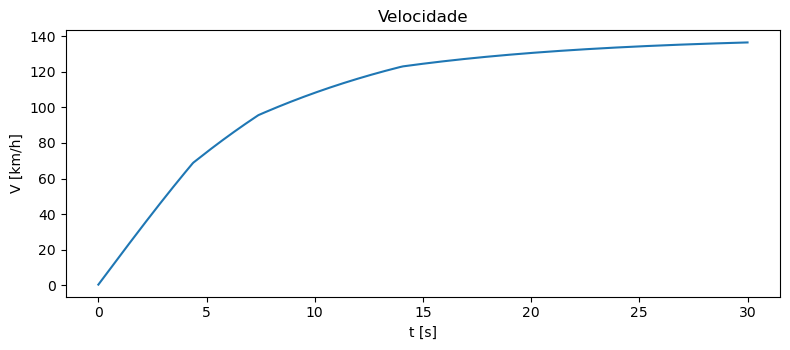

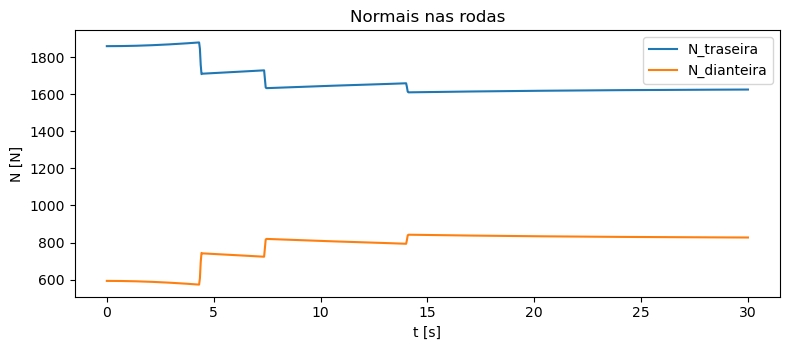

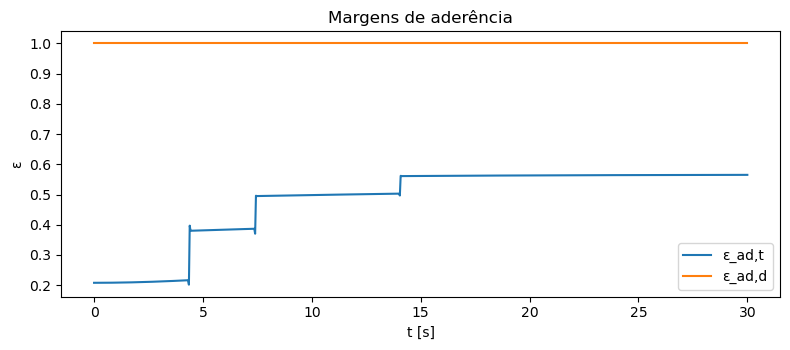

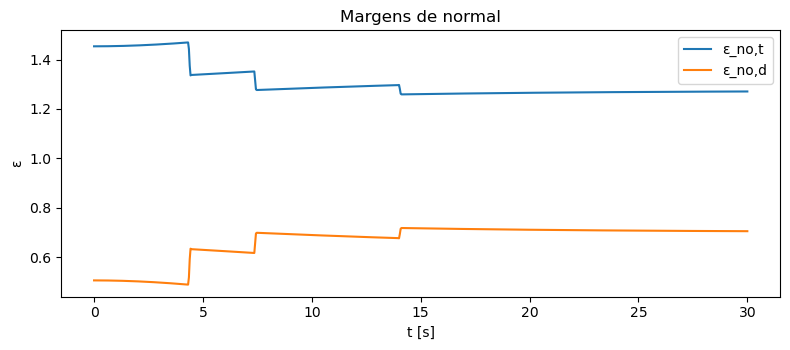

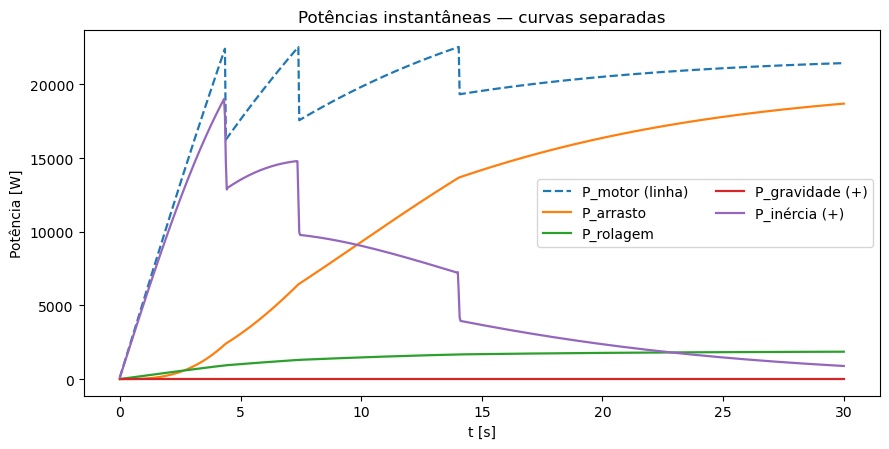

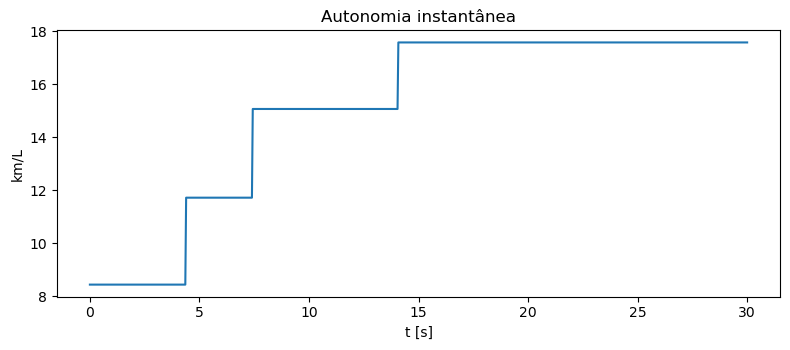

In [13]:
# ============================================================
# Simula√ß√£o + P√≥s-processamento em UMA execu√ß√£o
# - dV/dt gen√©rico (mu, beta_t, beta_d, normais)
# - motor P(œâ) com redline e sele√ß√£o autom√°tica de marcha
# - curvas separadas de pot√™ncia (sem empilhar) + autonomia
# ============================================================

import numpy as np                              # NumPy para vetores/matrizes
from scipy.integrate import solve_ivp           # solve_ivp: integrador de EDO
import matplotlib.pyplot as plt                 # Matplotlib para gr√°ficos

# ------------------------------
# 1) Par√¢metros do ve√≠culo/ambiente
# ------------------------------
m      = 250.0      # kg   | massa total (moto + piloto)
g      = 9.81       # m/s¬≤ | acelera√ß√£o da gravidade
theta  = 0.0        # rad  | inclina√ß√£o da pista (0 = plano)
rho    = 1.225      # kg/m¬≥| densidade do ar (n√≠vel do mar)
C_D    = 0.70       # -    | coeficiente de arrasto aerodin√¢mico
A_f    = 0.80       # m¬≤   | √°rea frontal efetiva
C_R    = 0.020      # -    | coeficiente de resist√™ncia √† rolagem
alpha  = 1.0        # -    | fra√ß√£o de uso do motor (0 a 1)
mu     = 0.80       # -    | coeficiente de atrito pneu-pista
beta_t = 0.0        # -    | fra√ß√£o do atrito dispon√≠vel usada na traseira (frenagem)
beta_d = 0.0        # -    | fra√ß√£o do atrito dispon√≠vel usada na dianteira (frenagem)
R_rod  = 0.30       # m    | raio efetivo da roda traseira
V_eps  = 1e-2       # m/s  | epsilon para evitar divis√£o por zero em P/V
W      = 0.0        # m/s  | vento longitudinal (sinal conforme V)
k_A    = 1/2 * rho * C_D * A_f  # N¬∑s¬≤/m‚Å¥ | par√¢metro aerodin√¢mico (¬Ω œÅ C_D A_f)

# Geometria (CG = centro de gravidade; CP = centro de press√£o)
h_CG, h_CP = 0.72, 0.95   # m | alturas do CG e do CP
p_d, p_CG  = 1.40, 0.67   # m | entre-eixos total e dist√¢ncia CG‚Üíeixo traseiro

# Curvatura (R_curva muito grande ‚âà movimento retil√≠neo)
R_curva = 1.0e10  # m

# Tempo de simula√ß√£o
t0, tf = 0.0, 30.0                       # s | intervalo de integra√ß√£o
t_eval = np.linspace(t0, tf, 800)        # pontos de avalia√ß√£o para sa√≠da suave

# ------------------------------
# 2) Transmiss√£o (um caso)
# ------------------------------
i_primary = 2.40                                        # - | rela√ß√£o prim√°ria
i_gears   = np.array([2.50, 1.80, 1.40, 1.20, 1.00])    # - | 1¬™..5¬™ marchas
i_final   = 2.60                                        # - | rela√ß√£o final
i_totals  = i_primary * i_final * i_gears               # - | rela√ß√µes totais por marcha

# ------------------------------
# 3) Modelo de pot√™ncia do motor P(œâ)
# ------------------------------
V_desl = 300e-6          # m¬≥   | cilindrada total
p_a    = 101325.0        # Pa   | press√£o do ar
T_a    = 293.15          # K    | temperatura do ar
eta_vol = 0.90           # -    | efici√™ncia volum√©trica
eta_m   = 0.30           # -    | rendimento mec√¢nico global
sigma   = 0.21           # -    | fra√ß√£o molar de O2 no ar
lam     = 1.0            # -    | fator de excesso de ar (estequiom√©trico)
R       = 8.314462618    # J/mol/K | constante universal dos gases

# Combust√≠vel ~ C8H18 (gasolina)
x, y, z = 8, 18, 0                               # - | estequiometria
PC_comb = 44.8e6                                 # J/kg | PCI
M_C, M_H, M_O = 12.011e-3, 1.008e-3, 15.999e-3   # kg/mol | massas molares
M_comb = x*M_C + y*M_H + z*M_O                   # kg/mol | massa molar do combust√≠vel

rpm_redline = 9500.0                             # rpm   | redline
w_redline   = rpm_redline * 2*np.pi/60.0         # rad/s | redline em rad/s

def pmotor(omega):
    """Retorna P_motor(œâ) [W] com corte no redline (œâ escalar ou array)."""
    gamma = x + y/4 - z/2                                                # termo auxiliar
    T_ref = (1/(4*np.pi)) * V_desl * (p_a/(R*T_a)) * (sigma*PC_comb*M_comb) / (sigma + lam*gamma)
    w = np.asarray(omega, float)                                         # garante array NumPy
    w_eff = np.where(w < w_redline, w, 0.0)                              # zera acima do redline
    return eta_m * eta_vol * w_eff * T_ref                               # W

def power_from_speed(V):
    """Seleciona a marcha com maior œâ < redline e retorna P_motor(V)."""
    omegas = i_totals * (V / R_rod)        # rad/s | œâ por marcha na velocidade V
    valid = np.where(omegas < w_redline)[0]# marchas v√°lidas (n√£o estouram redline)
    if valid.size == 0:                    # acima da Vm√°x da 5¬™ marcha
        return 0.0
    k = valid[np.argmax(omegas[valid])]    # marcha que d√° œâ v√°lido mais alto
    return pmotor(omegas[k])               # pot√™ncia dispon√≠vel nessa marcha

# Vers√£o vetorizada para p√≥s-processamento
power_from_speed_vec = np.vectorize(power_from_speed)

# ------------------------------
# 4) EDO dV/dt (gen√©rica)
# ------------------------------
def dVdt(t, y):
    V = max(y[0], 0.0)                         # imp√µe V ‚â• 0
    Veff = V if V > V_eps else V_eps           # evita divis√£o por zero em P/V

    # Propuls√£o dispon√≠vel
    P_av  = power_from_speed(V)                # W | pot√™ncia do motor para V
    F_prop = alpha * P_av / Veff               # N | for√ßa propulsiva efetiva

    # Normais aproximadas (sem termo inercial m*a*h_CG no ODE para simplicidade)
    N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d

    # Frenagem longitudinal (se beta_* > 0): limita pela disponibilidade de atrito
    F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd   # N | soma das contribui√ß√µes

    # Resist√™ncias
    F_aer  = 0.5 * rho * C_D * A_f * V*V       # N | arrasto
    F_rol  = C_R * m * g * np.cos(theta)       # N | rolagem (aprox. constante)
    F_grav = m * g * np.sin(theta)             # N | gravidade (rampa)

    # dV/dt = (Œ£ for√ßas) / m
    return [(F_prop - F_aer - F_rol - F_grav - F_fren) / m]

# ------------------------------
# 5) Integra
# ------------------------------
V0 = 0.1  # m/s | velocidade inicial (quase parado)
sol = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval, max_step=0.05)  # integra EDO
V = sol.y[0]; t = sol.t                                              # extrai V(t) e malha t
print(f"V_final = {V[-1]:.2f} m/s  ({3.6*V[-1]:.1f} km/h)")          # diagn√≥stico r√°pido

# ------------------------------
# 6) P√≥s-processamento
# ------------------------------
# Rota√ß√£o e pot√™ncia realmente usadas ao longo do tempo (com sele√ß√£o de marcha)
omegas_all = np.outer(i_totals, V / R_rod)                                      # œâ por marcha √ó tempo
valid_mask = omegas_all < w_redline                                             # m√°scara de validade
idx = np.argmax(np.where(valid_mask, omegas_all, -np.inf), axis=0)              # marcha escolhida
omega_sel = omegas_all[idx, np.arange(omegas_all.shape[1])]                     # œâ selecionada
P_motor = alpha * pmotor(omega_sel)                                             # W | pot√™ncia efetiva

# For√ßas longitudinais instant√¢neas
F_prop = P_motor / np.maximum(V, V_eps)                                         # N | propuls√£o
F_aer  = 0.5 * rho * C_D * A_f * V**2                                           # N | arrasto
F_rol  = C_R * m * g * np.cos(theta)                                            # N | rolagem
F_grav = m * g * np.sin(theta)                                                  # N | gravidade

# Normais REFINADAS (agora com termo inercial m*a*h_CG)
a = np.gradient(V, t, edge_order=2)                                             # m/s¬≤ | acelera√ß√£o
N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d

# Frenagem efetiva (no caso base, beta_* = 0 ‚Üí zero)
F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd                                        # N

# Curva (se quiser avaliar margens laterais; aqui R_curva enorme ‚Üí ~0)
F_cen_d = m*V**2/R_curva*(p_CG/p_d)                                             # N | demanda lateral dianteira
F_cen_t = m*V**2/R_curva*(1 - p_CG/p_d)                                         # N | demanda lateral traseira

# Resultantes de atrito e capacidades dispon√≠veis
F_fat_d = np.sqrt((0.0)**2 + F_cen_d**2)                                        # N | dianteira (sem tra√ß√£o)
F_fat_t = np.sqrt((F_prop - F_fren)**2 + F_cen_t**2)                             # N | traseira
F_disp_d = mu * N_rd                                                             # N | capacidade dianteira
F_disp_t = mu * N_rt                                                             # N | capacidade traseira

# Margens (Œµ): >0 folga; <0 excedeu
eps_ad_d = 1 - np.abs(F_fat_d)/np.maximum(np.abs(F_disp_d), 1e-9)                # ader√™ncia dianteira
eps_ad_t = 1 - np.abs(F_fat_t)/np.maximum(np.abs(F_disp_t), 1e-9)                # ader√™ncia traseira
N_est_d = m*g*np.cos(theta)*(p_CG/p_d)                                           # N | normal est√°tica dianteira
N_est_t = m*g*np.cos(theta)*(1 - p_CG/p_d)                                       # N | normal est√°tica traseira
eps_no_d = N_rd/np.maximum(N_est_d, 1e-9)                                   # margem de normal dianteira
eps_no_t = N_rt/np.maximum(N_est_t, 1e-9)                                    # margem de normal traseira

# Pot√™ncias (curvas separadas; positivas indicam demanda)
P_iner = m * V * a                                                               # W | in√©rcia (pode ser ¬±)
P_aer  = F_aer * V                                                               # W | arrasto
P_rol  = F_rol * V                                                               # W | rolagem
P_grav = F_grav * V                                                              # W | gravidade (¬±)
P_fren = F_fren * V                                                              # W | frenagem (+ se ativa)
P_iner_pos = np.maximum(P_iner, 0.0)                                             # W | parte positiva (demanda)
P_grav_pos = np.maximum(P_grav, 0.0)                                             # W | parte positiva (subida)

# Autonomia instant√¢nea (km/L) usando Œ∑_th ‚âà Œ∑_m * Œ∑_vol
rho_comb = 0.74                                                                  # kg/L | densidade gasolina
A_inst   = (eta_m * PC_comb * rho_comb / 1000.0) * V / np.maximum(P_motor, 1.0)# km/L | autonomia instant√¢nea

# ------------------------------
# 7) Gr√°ficos
# ------------------------------
# Velocidade
plt.figure(figsize=(8,3.6))
plt.plot(t, V*3.6)
plt.xlabel('t [s]'); plt.ylabel('V [km/h]'); plt.title('Velocidade')
plt.tight_layout(); plt.show()

# Normais
plt.figure(figsize=(8,3.6))
plt.plot(t, N_rt, label='N_traseira')
plt.plot(t, N_rd, label='N_dianteira')
plt.xlabel('t [s]'); plt.ylabel('N [N]'); plt.title('Normais nas rodas'); plt.legend()
plt.tight_layout(); plt.show()

# Margens de ader√™ncia
plt.figure(figsize=(8,3.6))
plt.plot(t, eps_ad_t, label='Œµ_ad,t')
plt.plot(t, eps_ad_d, label='Œµ_ad,d')
plt.xlabel('t [s]'); plt.ylabel('Œµ'); plt.title('Margens de ader√™ncia'); plt.legend()
plt.tight_layout(); plt.show()

# Margens de normal
plt.figure(figsize=(8,3.6))
plt.plot(t, eps_no_t, label='Œµ_no,t')
plt.plot(t, eps_no_d, label='Œµ_no,d')
plt.xlabel('t [s]'); plt.ylabel('Œµ'); plt.title('Margens de normal'); plt.legend()
plt.tight_layout(); plt.show()

# Pot√™ncias (curvas separadas, sem empilhar)
plt.figure(figsize=(9,4.6))
plt.plot(t, P_motor, '--', lw=1.6, label='P_motor (linha)')
plt.plot(t, P_aer,          lw=1.6, label='P_arrasto')
plt.plot(t, P_rol,          lw=1.6, label='P_rolagem')
plt.plot(t, P_grav_pos,     lw=1.6, label='P_gravidade (+)')
plt.plot(t, P_iner_pos,     lw=1.6, label='P_in√©rcia (+)')
if np.any(P_fren > 0):
    plt.plot(t, np.maximum(P_fren,0.0), lw=1.6, label='P_frenagem (+)')
plt.xlabel('t [s]'); plt.ylabel('Pot√™ncia [W]')
plt.title('Pot√™ncias instant√¢neas ‚Äî curvas separadas')
plt.legend(loc='best', ncols=2)
plt.tight_layout(); plt.show()

# Autonomia
plt.figure(figsize=(8,3.6))
plt.plot(t, A_inst)
plt.xlabel('t [s]'); plt.ylabel('km/L'); plt.title('Autonomia instant√¢nea')
plt.tight_layout(); plt.show()


In [9]:
# === Rodar cen√°rios sem mexer na c√©lula principal ============================
def run_once(label, return_data=False, **overrides):
    """
    Executa 1 cen√°rio trocando apenas os par√¢metros informados.
    Exemplos:
        run_once('curta', i_final=3.20)
        run_once('aero melhor', C_D=0.65, A_f=0.75)
        run_once('motor', eta_m=0.35, eta_vol=0.95, rpm_redline=10500)

    Recursos:
      ‚Ä¢ Recalcula DERIVADOS quando necess√°rio:
          - k_A  se {rho, C_D, A_f} mudarem
          - w_redline se rpm_redline mudar
          - i_totals se {i_primary, i_final, i_gears} mudarem
      ‚Ä¢ Usa o mesmo dVdt/pmotor j√° definidos na c√©lula principal.
      ‚Ä¢ Plota: velocidade, pot√™ncias (separadas), autonomia, margens de ader√™ncia/normal.
      ‚Ä¢ Mostra um separador visual entre cen√°rios.
      ‚Ä¢ Restaura os valores originais ao final.
      ‚Ä¢ Se return_data=True, devolve {'t','V','P_motor'}.
    """
    # -------- Separador visual entre estudos --------
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"\n---\n\n### üîπ Cen√°rio: **{label}**\n"))
    except Exception:
        print("\n" + "‚ïê"*18 + f" {label} " + "‚ïê"*18)

    # -------- 1) Salva originais e aplica overrides --------
    backup = {}
    for k, v in overrides.items():
        if k in globals():
            backup[k] = globals()[k]
        globals()[k] = v

    # -------- 2) Recalcula DERIVADOS antes de rodar --------
    changed = set(overrides)

    # aerodin√¢mica ‚Üí k_A
    if {'rho', 'C_D', 'A_f'} & changed:
        globals()['k_A'] = 0.5 * globals()['rho'] * globals()['C_D'] * globals()['A_f']

    # redline rpm ‚Üí rad/s
    if 'rpm_redline' in changed and 'w_redline' not in changed:
        globals()['w_redline'] = globals()['rpm_redline'] * 2*np.pi/60.0

    # transmiss√£o ‚Üí i_totals
    if {'i_primary', 'i_final', 'i_gears'} & changed:
        globals()['i_totals'] = globals()['i_primary'] * globals()['i_final'] * globals()['i_gears']

    # -------- 3) Integra com o MESMO dVdt j√° definido --------
    V0 = globals().get('V0', 0.01)
    sol_loc = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval, max_step=0.05)
    t_loc = sol_loc.t
    V_loc = sol_loc.y[0]
    a_loc = np.gradient(V_loc, t_loc, edge_order=2)

    # -------- 4) P√≥s-processamento essencial --------
    # sele√ß√£o de marcha e pot√™ncia do motor
    omegas_all = np.outer(i_totals, V_loc / R_rod)
    valid_mask = omegas_all < w_redline
    idx = np.argmax(np.where(valid_mask, omegas_all, -np.inf), axis=0)
    omega_sel = omegas_all[idx, np.arange(omegas_all.shape[1])]
    P_m = alpha * pmotor(omega_sel)

    # for√ßas principais
    F_prop = P_m / np.maximum(V_loc, V_eps)
    F_aer  = 0.5 * rho * C_D * A_f * V_loc**2
    F_rol  = C_R * m * g * np.cos(theta)
    F_grav = m * g * np.sin(theta)

    # pot√™ncias principais
    P_iner = m * V_loc * a_loc
    P_aer  = F_aer * V_loc
    P_rol  = F_rol * V_loc
    P_grav = F_grav * V_loc

    # autonomia (km/L)
    rho_comb = globals().get('rho_comb', 0.74)  # kg/L (padr√£o)
    A_inst   = (eta_m * eta_vol * PC_comb * rho_comb / 1000.0) * V_loc / np.maximum(P_m, 1.0)

    # -------- Margens (ader√™ncia e normal) --------
    W      = globals().get('W', 0.0)
    h_CG   = globals().get('h_CG', 0.72)
    h_CP   = globals().get('h_CP', 0.95)
    p_d_   = globals().get('p_d', 1.40)
    p_CG_  = globals().get('p_CG', 0.67)
    R_curv = globals().get('R_curva', 1e10)

    # Normais com termo inercial (eqs. 2‚Äì3)
    N_rt = m*g*np.cos(theta)*(1 - p_CG_/p_d_) + (m*a_loc*h_CG + k_A*(V_loc - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d_
    N_rd = m*g*np.cos(theta)*(p_CG_/p_d_)     - (m*a_loc*h_CG + k_A*(V_loc - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d_

    # Demandas laterais
    F_cen_d = m*V_loc**2/R_curv*(p_CG_/p_d_)
    F_cen_t = m*V_loc**2/R_curv*(1 - p_CG_/p_d_)

    # Resultantes de atrito
    F_fat_d = np.sqrt((0.0)**2 + F_cen_d**2)      # dianteira sem tra√ß√£o
    F_fat_t = np.sqrt((F_prop)**2 + F_cen_t**2)   # traseira com propuls√£o

    # Capacidades e margens Œµ (>0 folga, <0 excedeu)
    F_disp_d = mu * N_rd
    F_disp_t = mu * N_rt
    eps_ad_d = 1 - np.abs(F_fat_d)/np.maximum(np.abs(F_disp_d), 1e-9)
    eps_ad_t = 1 - np.abs(F_fat_t)/np.maximum(np.abs(F_disp_t), 1e-9)

    N_est_d = m*g*np.cos(theta)*(p_CG_/p_d_)
    N_est_t = m*g*np.cos(theta)*(1 - p_CG_/p_d_)
    eps_no_d = N_rd/np.maximum(N_est_d, 1e-9)
    eps_no_t = N_rt/np.maximum(N_est_t, 1e-9)

    # -------- 5) Gr√°ficos (identificados pelo label) --------
    # Velocidade
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, V_loc*3.6)
    plt.xlabel('t [s]'); plt.ylabel('V [km/h]'); plt.title(f'Velocidade ‚Äî {label}')
    plt.tight_layout(); plt.show()

    # Pot√™ncias (curvas separadas, sem empilhar)
    plt.figure(figsize=(9,4.6))
    plt.plot(t_loc, P_m,              '--', lw=1.6, label='P_motor (linha)')
    plt.plot(t_loc, P_aer,                  lw=1.6, label='P_arrasto')
    plt.plot(t_loc, P_rol,                  lw=1.6, label='P_rolagem')
    plt.plot(t_loc, np.maximum(P_grav, 0),  lw=1.6, label='P_gravidade (+)')
    plt.plot(t_loc, np.maximum(P_iner, 0),  lw=1.6, label='P_in√©rcia (+)')
    plt.legend(loc='best', ncols=2)
    plt.xlabel('t [s]'); plt.ylabel('Pot√™ncia [W]'); plt.title(f'Pot√™ncias ‚Äî {label}')
    plt.tight_layout(); plt.show()

    # Autonomia
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, A_inst)
    plt.xlabel('t [s]'); plt.ylabel('km/L'); plt.title(f'Autonomia instant√¢nea ‚Äî {label}')
    plt.tight_layout(); plt.show()

    # Margens de ader√™ncia
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, eps_ad_t, label='Œµ_ad,t (traseira)')
    plt.plot(t_loc, eps_ad_d, label='Œµ_ad,d (dianteira)')
    plt.axhline(0, color='k', lw=0.8, alpha=0.6)
    plt.xlabel('t [s]'); plt.ylabel('Œµ'); plt.title(f'Margens de ader√™ncia ‚Äî {label}')
    plt.legend(loc='best'); plt.tight_layout(); plt.show()

    # Margens de normal
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, eps_no_t, label='Œµ_no,t (traseira)')
    plt.plot(t_loc, eps_no_d, label='Œµ_no,d (dianteira)')
    plt.axhline(0, color='k', lw=0.8, alpha=0.6)
    plt.xlabel('t [s]'); plt.ylabel('Œµ'); plt.title(f'Margens de normal ‚Äî {label}')
    plt.legend(loc='best'); plt.tight_layout(); plt.show()

    # -------- 6) Restaura os valores originais --------
    for k, v in backup.items():
        globals()[k] = v

    # Recalcula derivados ap√≥s restaurar
    changed = set(overrides)
    if {'rho', 'C_D', 'A_f'} & changed:
        globals()['k_A'] = 0.5 * globals()['rho'] * globals()['C_D'] * globals()['A_f']
    if 'rpm_redline' in changed and 'w_redline' not in changed:
        globals()['w_redline'] = globals()['rpm_redline'] * 2*np.pi/60.0
    if {'i_primary', 'i_final', 'i_gears'} & changed:
        globals()['i_totals'] = globals()['i_primary'] * globals()['i_final'] * globals()['i_gears']

    # -------- 7) Retorno opcional --------
    if return_data:
        return {'t': t_loc, 'V': V_loc, 'P_motor': P_m}



---

### üîπ Cen√°rio: **Pouco atrito, mu=0.4**


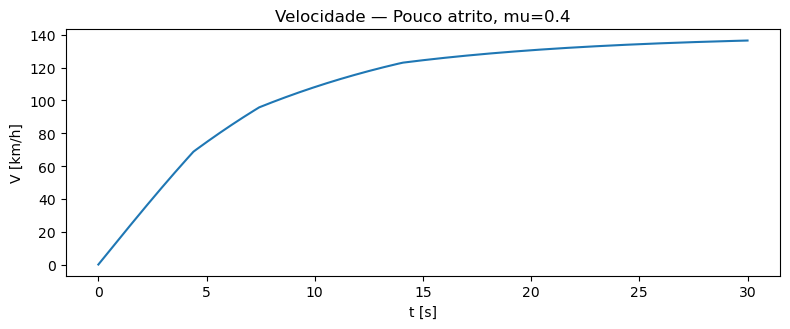

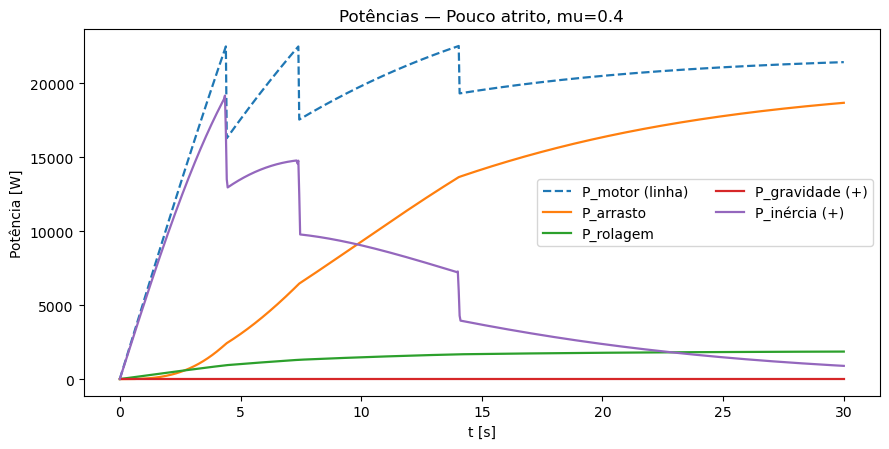

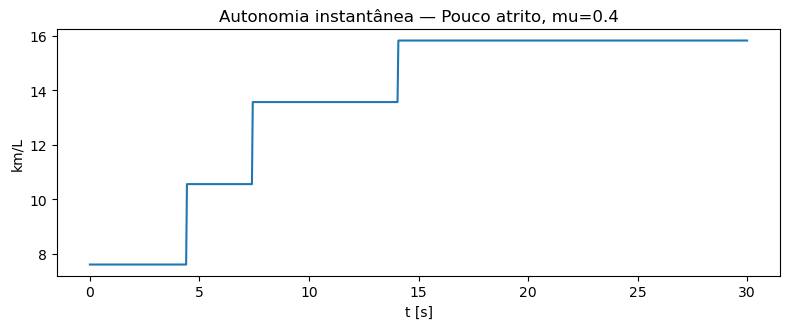

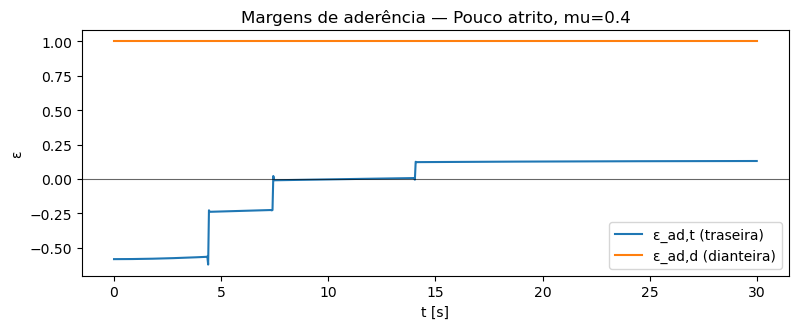

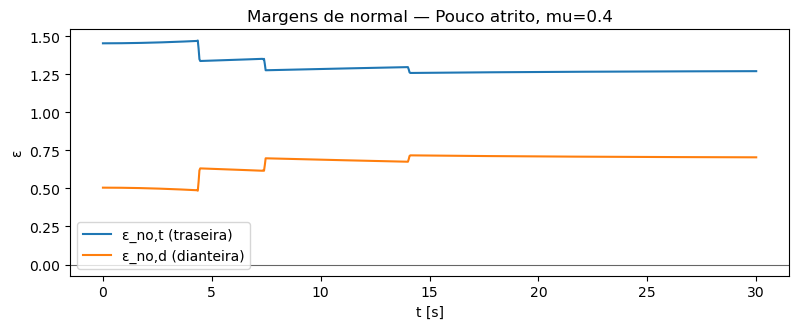


---

### üîπ Cen√°rio: **Mais alta, h_CG=1.2**


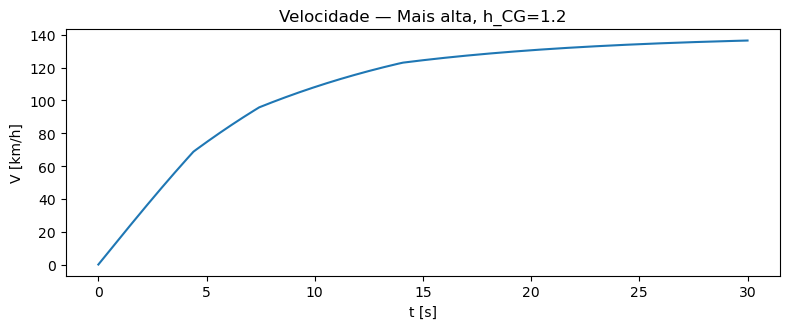

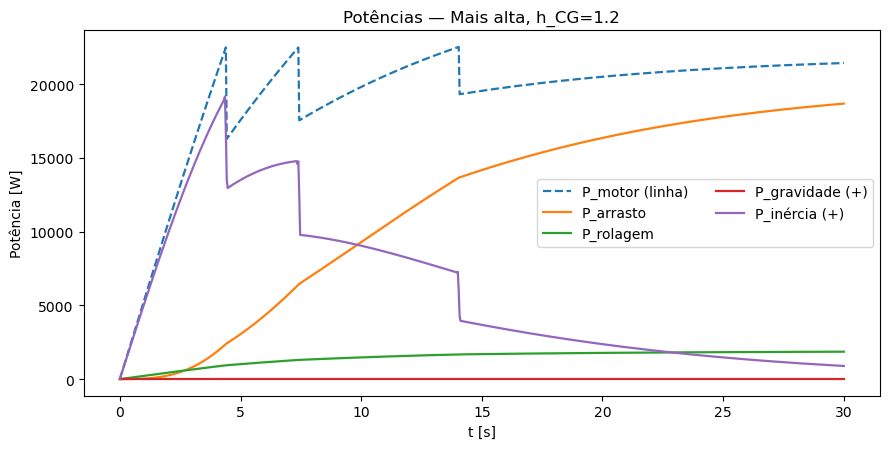

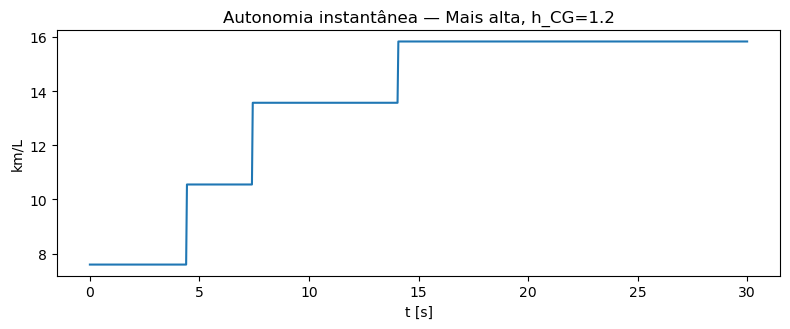

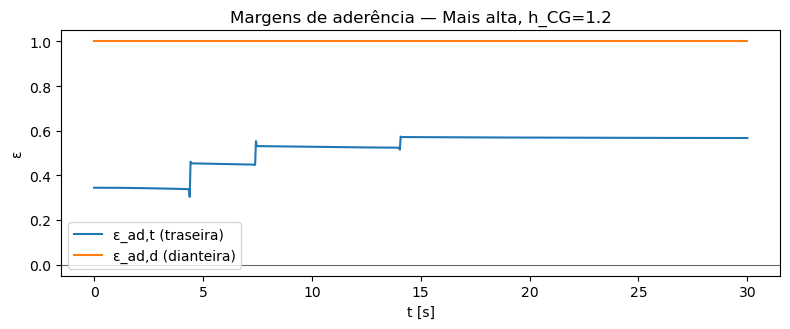

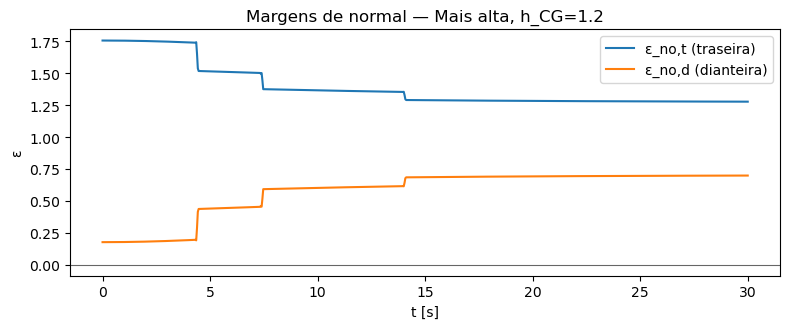


---

### üîπ Cen√°rio: **Moto mais leve, m=150**


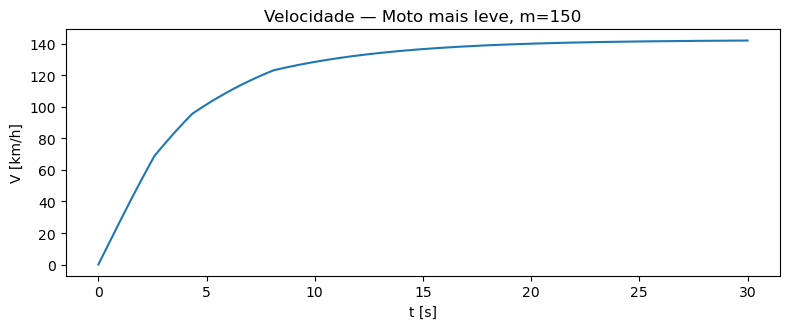

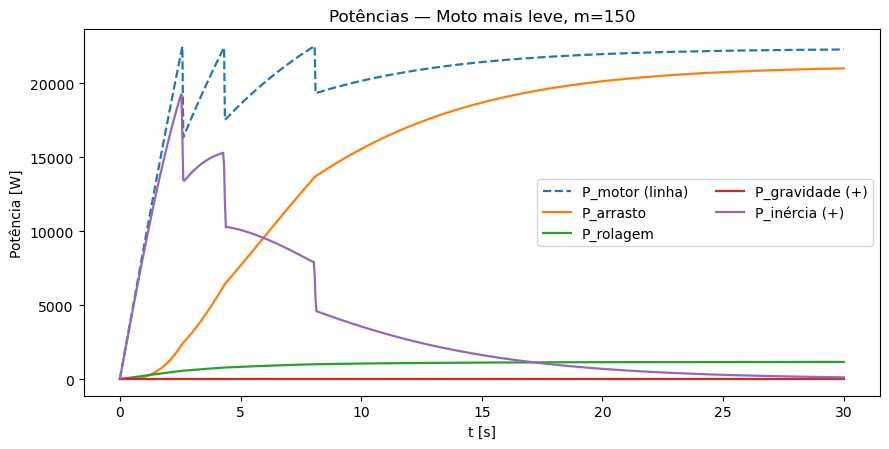

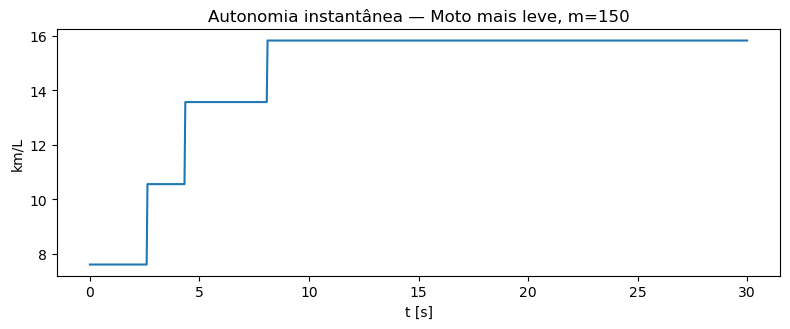

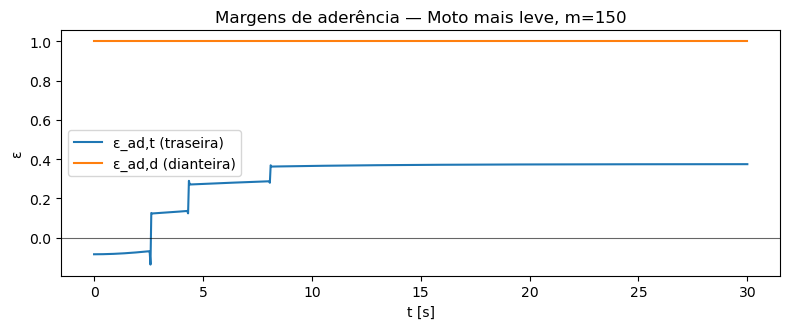

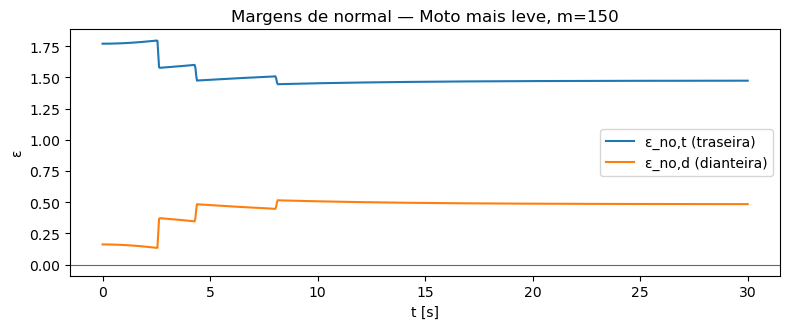


---

### üîπ Cen√°rio: **Melhor aerodin√¢mica, C_D=0.4**


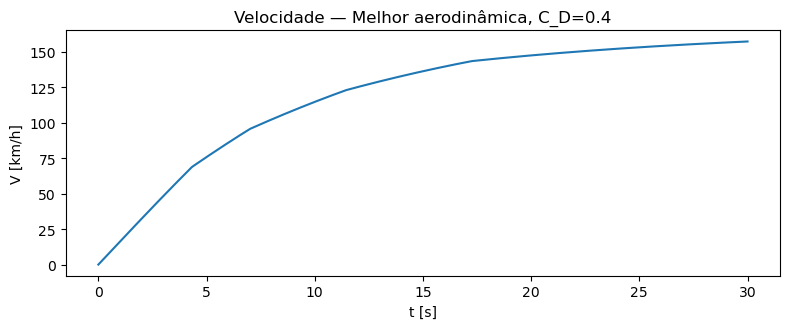

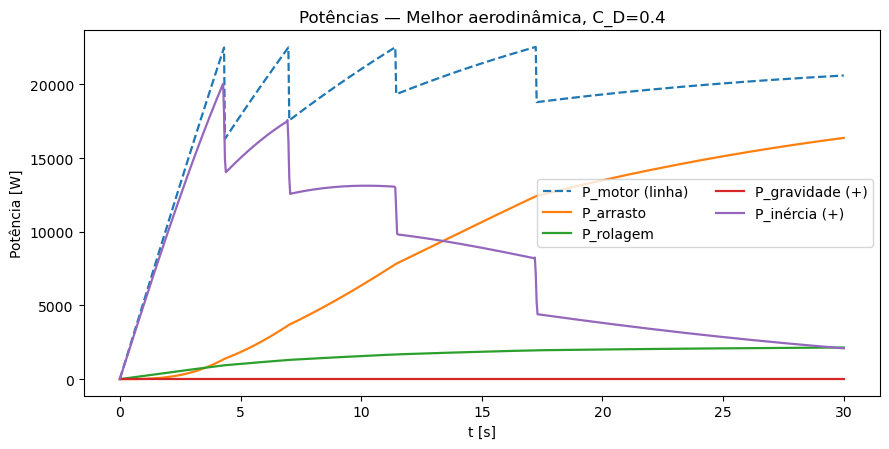

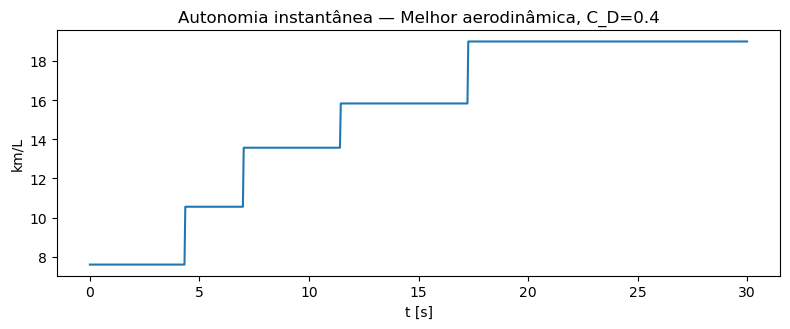

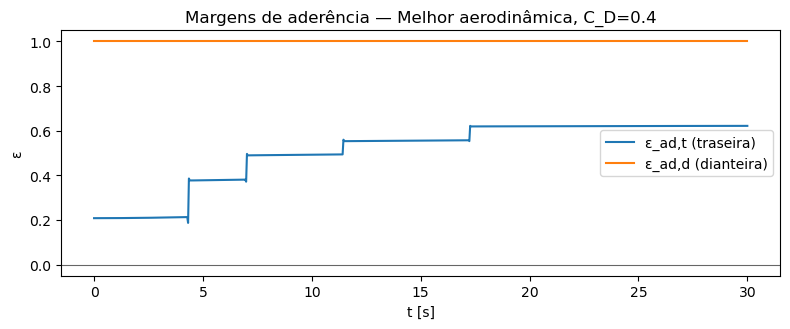

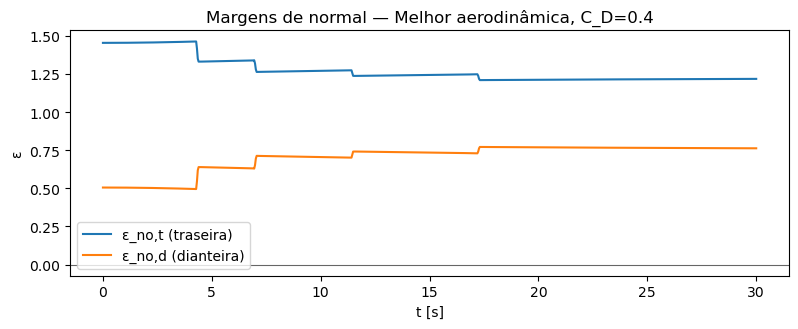


---

### üîπ Cen√°rio: **Curva, R_curva=100**


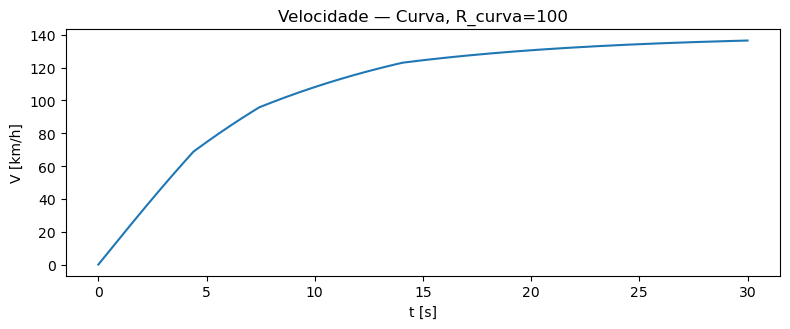

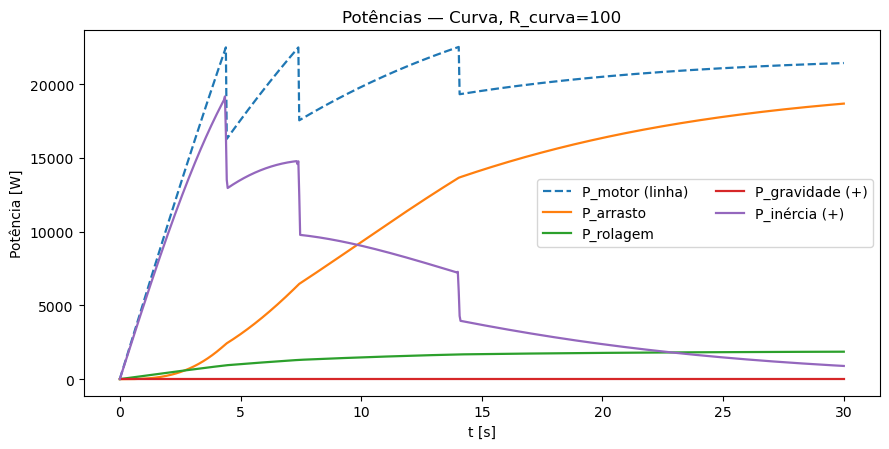

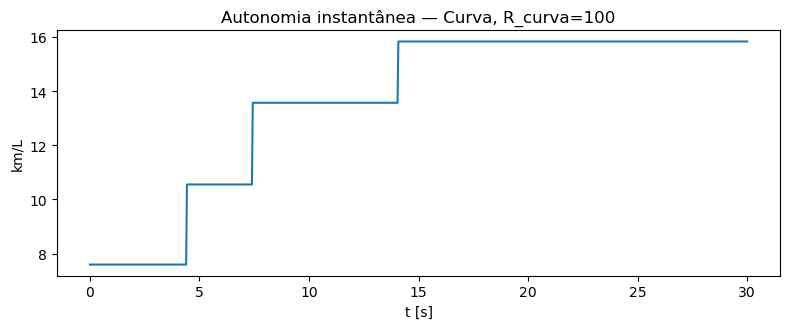

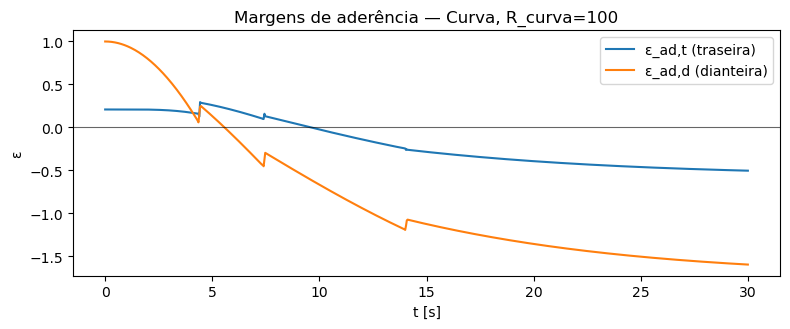

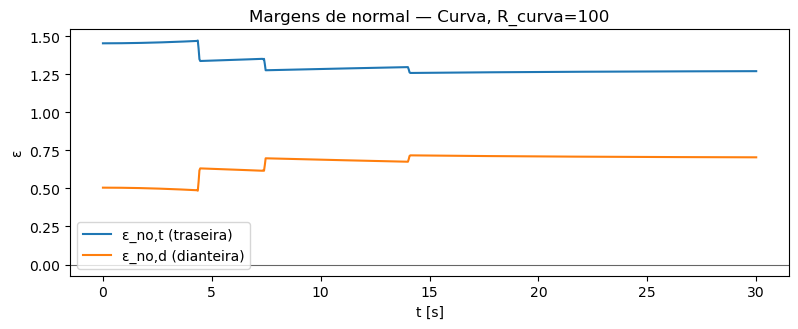

In [11]:
run_once('Pouco atrito, mu=0.4', mu=0.4);
run_once('Mais alta, h_CG=1.2', h_CG=1.2);
run_once('Moto mais leve, m=150', m=150);
run_once('Melhor aerodin√¢mica, C_D=0.4', C_D=0.4);         # w_redline √© recalculado
run_once('Curva, R_curva=100', R_curva=100);
